## 系统性风险与非系统性风险
在理论上，股票面临的风险可以抽象的划分为系统性风险与非系统性风险。系统性风险（不可分散风险），也称市场风险，通常是由于公司外部因素引起、与公司正常经营无关的风险；非系统性风险（可分散风险），通常是由于公司自身原因引起的风险。

本文以上证180指数成分股为例演示投资组合的系统性风险与非系统性风险，数据集时间为2016-2018年，已剔除期间上市的股票，最终保留155只股票，在该数据集中，等权重逐步增加投资组合的股票个数，其Python程序如下：


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif'] = ['SimHei'] #中文显示问题
plt.rcParams['axes.unicode_minus'] = False #负数显示问题

In [8]:

stocks_data = pd.read_excel(r'上证180指数成分股日收盘价.xlsx',header = 0,index_col = 0)
#观察数据
stocks_data.head()
stocks_data.shape

#计算对数收益率
return_stocks = np.log(stocks_data/stocks_data.shift(1))
return_stocks = return_stocks.dropna()
#获取行数
n = return_stocks.shape[1]
#构建投资组合的波动率一维数组
vol_port = np.zeros(n)

for i in range(1,n+1):
    weight = np.ones(i)/i
    return_cov = 252*return_stocks.iloc[:,:i].cov()
    
    vol_port[i-1] = np.sqrt(np.dot(weight,np.dot(return_cov,weight.T)))
    
N_list = np.arange(n) + 1 #生产1-155的数组

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(N_list,vol_port,'+-')
plt.xlabel('投资组合的成分股个数')
plt.ylabel('波动率')
plt.grid('True')


## 资本资产定价模型

alpha的值： 0.0002
beta的值： 1.3874


C:\Users\admin\AppData\Local\Temp\ipykernel_10048\2256601179.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('alpha的值：',round(resul_shjc.params[0],4))
C:\Users\admin\AppData\Local\Temp\ipykernel_10048\2256601179.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('beta的值：',round(resul_shjc.params[1],4))
C:\Users\admin\AppData\Local\Temp\ipykernel_10048\2256601179.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

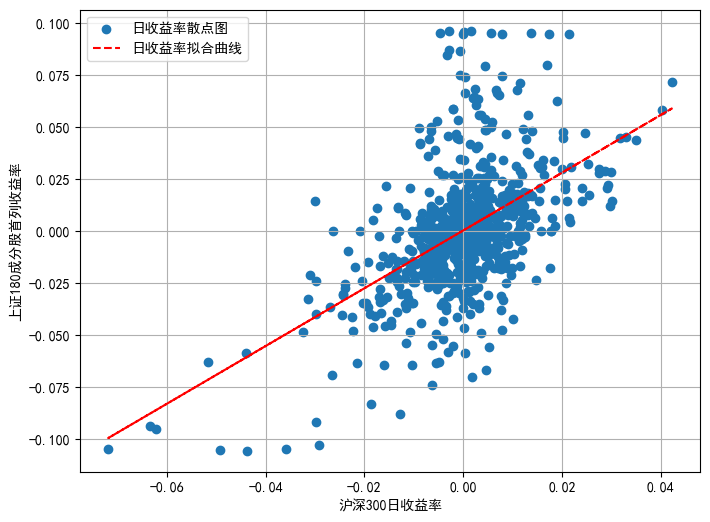

In [13]:
# 以沪深300指数（2016-2018年）作为市场组合，使用线性回归（使用statsmodels.api模块的线性回归函数，详情可参照官网介绍）来计算上例中上证180的第一列成分股相应的β值，其Python的程序如下：

import statsmodels.api as sm

#读取数据
stocks_index = pd.read_excel(r'沪深300指数.xlsx',header = 0,index_col = 0)
#计算对数收益率
R_index = np.log(stocks_index/stocks_index.shift(1))
R_index = R_index.dropna()
#数据观测
R_index.describe()

#线性回归添加常数列
R_index_addcons = sm.add_constant(R_index)

model_shjc = sm.OLS(endog=return_stocks.iloc[:,0],exog=R_index_addcons)

resul_shjc = model_shjc.fit()
print('alpha的值：',round(resul_shjc.params[0],4))
print('beta的值：',round(resul_shjc.params[1],4))
#alpha的值： 0.0002
#beta的值： 1.3874

plt.figure(figsize=(8,6))
plt.scatter(R_index,return_stocks.iloc[:,0],label = '日收益率散点图')
plt.plot(R_index,resul_shjc.params[0] + resul_shjc.params[1]*R_index,'r--',label = '日收益率拟合曲线')
plt.xlabel('沪深300日收益率')
plt.ylabel('上证180成分股首列收益率')
plt.legend()
plt.grid('True')
